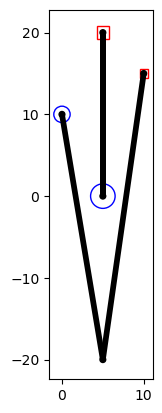

Congradulation!!!!! no collisoin!!!!! it's a valid instance of pcb board


In [4]:
from component import Wire, RectPad, Pad, SquarePad
import collision
import board
import matplotlib.pyplot as plt

def visualize_board(board):
    # 先把所有的component列出來
    fig, ax = plt.subplots()
    for component_name in board.components.keys():
        # component_name 是一個string, 
        if board.components[component_name].type == 'pad':
            center = board.components[component_name].position
            # print(center)
            radius = board.components[component_name].radius
            # print(radius)
            circle = plt.Circle(center, radius, color='blue', fill=False)
            ax.add_patch(circle)
        elif board.components[component_name].type == 'wire':
            radius = board.components[component_name].width / 2
            
            start_point = board.components[board.components[component_name].start_component].position
            ax.add_patch(plt.Circle(start_point, radius, color = 'black', fill = True))
            
            end_point = board.components[board.components[component_name].end_component].position
            ax.add_patch(plt.Circle(end_point, radius, color = 'black', fill = True))
            
            relay_points = board.components[component_name].get_relay_points()
            
            for point in relay_points:
                center = point
                # circle = plt.Circle(end_point, radius * 3, color = 'black', fill = True)
                ax.add_patch(plt.Circle(point, radius, color = 'black', fill = True))

            rectangles = board.components[component_name].get_segments()

            for rectangle in rectangles:
                ax.add_patch(plt.Polygon(rectangle, closed=True, fill=True, color = 'black', linewidth = 0.0001)) # 0.0001隨便assign的反正不是很重要
                
        else: # 那只剩rectpad和squarepad
            rectangle = board.components[component_name].get_corners()
            # print("4 corners is {}".format(rectangle))
            ax.add_patch(plt.Polygon(rectangle, closed = True, fill = False, edgecolor = 'red'))
            
    ax.set_aspect('equal')        # 坐标轴保持 1:1
    ax.autoscale_view()           # 自动缩放坐标范围
    # plt.savefig("board_output.png", format="png")
    plt.show()
    
def collision_detection(board):
    component_name = list(board.components.keys())
    
    for component in component_name:
        # print("the current component in hand is {}".format(component))
        test_list = list(board.components.keys()) # make a copy of component
        test_list.remove(component)
        
        # print("test_list is {}".format(test_list))

        for test_obj in test_list:
            collided = board.check_collision(board.components[test_obj], board.components[component])

            if collided:
                return True

    return False # 能做到這代表兩兩檢查都沒有碰撞
        
board = board.good_board('foo2.txt')
# print(type(board.components))
visualize_board(board)
if not collision_detection(board):
    print("Congradulation!!!!! no collisoin!!!!! it's a valid instance of pcb board")
else:
    print("Collision detected")